## Documentation/Sources
* [https://radimrehurek.com/gensim/models/word2vec.html](https://radimrehurek.com/gensim/models/word2vec.html) for more information about how to use gensim word2vec in general
* _Blog post has been removed_ [https://codekansas.github.io/blog/2016/gensim.html](https://codekansas.github.io/blog/2016/gensim.html) for information about using it to create embedding layers for neural networks.
* [https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/](https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/) for information on sequence classification with keras
* [https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html) for using pre-trained embeddings with keras (though the syntax they use for the model layers is different than most other tutorials).
* [https://keras.io/](https://keras.io/) Keras API documentation

## Load Trained Word Vectors

In [87]:
from gensim.models import word2vec
from tqdm.notebook import tqdm
import numpy as np
import pprint

Load the trained model file into memory

In [37]:
print("stating")
wv_model = tqdm(word2vec.Word2Vec.load('1billion_word_vectors/1billion_word_vectors'))
print("stating")

stating


0it [00:00, ?it/s]

stating


In [7]:
wordvec = wv_model.wv
del wv_model

## Explore Word Vectors
Now we can look at some of the relationships between different words.

Like [the gensim documentation](https://radimrehurek.com/gensim/models/word2vec.html), let's start with a famous example: king + woman - man

In [8]:
wordvec.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.8407386541366577),
 ('monarch', 0.7541723847389221),
 ('prince', 0.7350203394889832),
 ('princess', 0.696908175945282),
 ('empress', 0.6771803498268127),
 ('sultan', 0.6649758815765381),
 ('Chakri', 0.6451102495193481),
 ('goddess', 0.6439394950866699),
 ('ruler', 0.6275452971458435),
 ('kings', 0.6273427605628967)]

In [63]:
wordvec.similar_by_vector(wordvec['man'], 4)


[('man', 1.0653877258300781),
 ('woman', 0.8369502425193787),
 ('teenager', 0.7884278297424316),
 ('boy', 0.7414097189903259)]

In [136]:
idx = 0
word = "cute"
init = list(wordvec[word])
vman = init[:]
# vman.setflags(write=1)
vman = np.asarray(vman)


new = []
for j in tqdm(range(7)):
    org = vman[j]
    for i in range(50):
        vman[j] = org+(i-25)
        val = wordvec.similar_by_vector(vman, 1)[0][0]
        if val != word:
            new.append({"word": val, "idx": j, "mod": org+(i-25)})
#             print(val, j)
#         print(wordvec.similar_by_vector(vman, 1)[0][0], org+(i-11))
# print(new)
# print(vman[0])
# print(wordvec['woman'][0])



# print(wordvec.similar_by_vector(wordvec['woman'], 3))








  0%|          | 0/7 [00:00<?, ?it/s]

In [137]:
# 40 41 48 51

In [138]:
seen = set([])
filtered = []
for i in new:
    if i["word"]+str(i["idx"]) in seen:
        pass
    else: 
        seen.add(i["word"]+str(i["idx"]))
        filtered.append(i)
        
# sorted(filtered, key=
        
    

In [139]:
for i in filtered:
#     pprint.pprint(i, width = -3)
    print(i["idx"], i["word"])

1 distractible
1 relatable
3 Twilight-inspired
4 loveable
4 Low-caste
4 Morris-Endeavor
4 Voris
5 Low-caste
5 Voris
6 Woolrich
6 Voris
6 Memorialization


In [141]:
wordvec["sad"] - wordvec["upset"]

array([ 0.38865358, -2.1107743 , -2.003988  , -0.31166077,  0.97522616,
        1.4073135 , -0.98492455, -2.4262545 , -0.7087455 ,  3.0240846 ,
        0.0985974 ,  3.405747  ,  2.206282  ,  1.1213834 , -0.42690405,
       -0.23373044, -1.6159244 ,  2.7046468 ,  5.967234  , -3.6125023 ,
       -1.6524575 , -0.51258636, -0.10651779,  2.484518  ,  1.8357123 ,
       -2.0842283 ,  3.402295  ,  4.5033426 , -2.4330144 , -2.230759  ,
        5.524397  ,  4.8115845 , -4.670179  , -0.7791498 ,  0.01813507,
        1.7689639 ,  0.1497581 , -2.385136  , -1.6071137 ,  2.3212562 ,
        1.8299152 ,  0.5422261 ,  5.6654196 ,  0.61587846, -0.71751326,
       -2.302374  ,  1.4522423 ,  1.4342182 , -5.640812  , -0.8586035 ,
        2.2799087 ,  4.016923  ,  2.187685  , -0.10254097, -0.5406332 ,
        4.625556  , -5.2651887 ,  2.3313272 ,  0.94915676, -1.5027626 ,
       -2.8596325 , -0.7064119 , -4.1055546 ,  2.6064713 , -0.3552088 ,
       -1.4843247 ,  0.03060269, -1.5442756 ,  2.977877  ,  1.85

In [153]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [173]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    data = [list(wordvec["sad"])]
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(100, 1),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

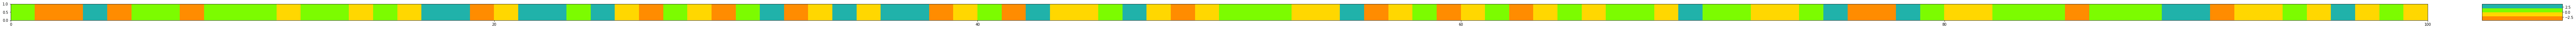

In [176]:
# cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
plot_examples([cmap])